In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

In [2]:
# 자신이 설정하는 파라미터
batch_size = 2000 # 배치사이즈
epochs = 100 # 에포크수

# batch_size = 2000 # 배치사이즈
# epochs = 2 # 에포크수

In [3]:
#데이터 추출
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
num_classes = 10
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# one-hot-label에 변환
# 기존 프로그램과 다름
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [8]:
# 모델의 구축
model = Sequential()

# 첫번째 히든 레이어(입력784 -> 출력256)
model.add(Dense(256, activation="relu",input_shape=(784,)))
model.add(Dropout(0.1))

# 두번째 히든 레이어(256 -> 출력128)
## 히든레이어는 아래의 두행을 복사->붙여넣기하는 것으로 추가할 수 있습니다.
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))

# 3번째 히든 레이어(128 -> 출력32)
## 은닉층은 아래의 두 줄을 복사하여 붙여넣음으로써 추가할 수 있습니다.
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))

# 출력 레이어(입력32 -> 출력10)
model.add(Dense(10, activation='softmax'))

# 모델 개요 표시
model.summary()

# 모델의 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

# 피팅(학습)
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

# 스코어의 계산과 표시
score = model.evaluate(x_test, y_test, verbose=1)  # 디폴트로 계산되는 배치사이즈는 32임  따라서 배치의 개수는 10000/32=312.5 라서 313개로 나옴
print('Test loss:', score[0]) #loss:  학습 데이터에서의 손실값, accuracy: 학습 데이터에서의 정확도
print('Test accuracy:', score[1]) #val_loss: 검증 데이터에서의 손실값, val_accuracy: 검 데이터에서의 정확도

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                3

2024-12-13 21:16:28.642636: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


30/30 [==============================] - 1s 13ms/step - loss: 2.2960 - accuracy: 0.1429 - val_loss: 2.2330 - val_accuracy: 0.2335
Epoch 2/100
30/30 [==============================] - 0s 11ms/step - loss: 2.2113 - accuracy: 0.2365 - val_loss: 2.1507 - val_accuracy: 0.3745
Epoch 3/100
30/30 [==============================] - 0s 11ms/step - loss: 2.1300 - accuracy: 0.3236 - val_loss: 2.0500 - val_accuracy: 0.4577
Epoch 4/100
30/30 [==============================] - 0s 12ms/step - loss: 2.0307 - accuracy: 0.3968 - val_loss: 1.9254 - val_accuracy: 0.5107
Epoch 5/100
30/30 [==============================] - 0s 11ms/step - loss: 1.9118 - accuracy: 0.4514 - val_loss: 1.7796 - val_accuracy: 0.5647
Epoch 6/100
30/30 [==============================] - 0s 12ms/step - loss: 1.7763 - accuracy: 0.5015 - val_loss: 1.6186 - val_accuracy: 0.6253
Epoch 7/100
30/30 [==============================] - 0s 12ms/step - loss: 1.6306 - accuracy: 0.5516 - val_loss: 1.4500 - val_accuracy: 0.6910
Epoch 8/100
30/30 

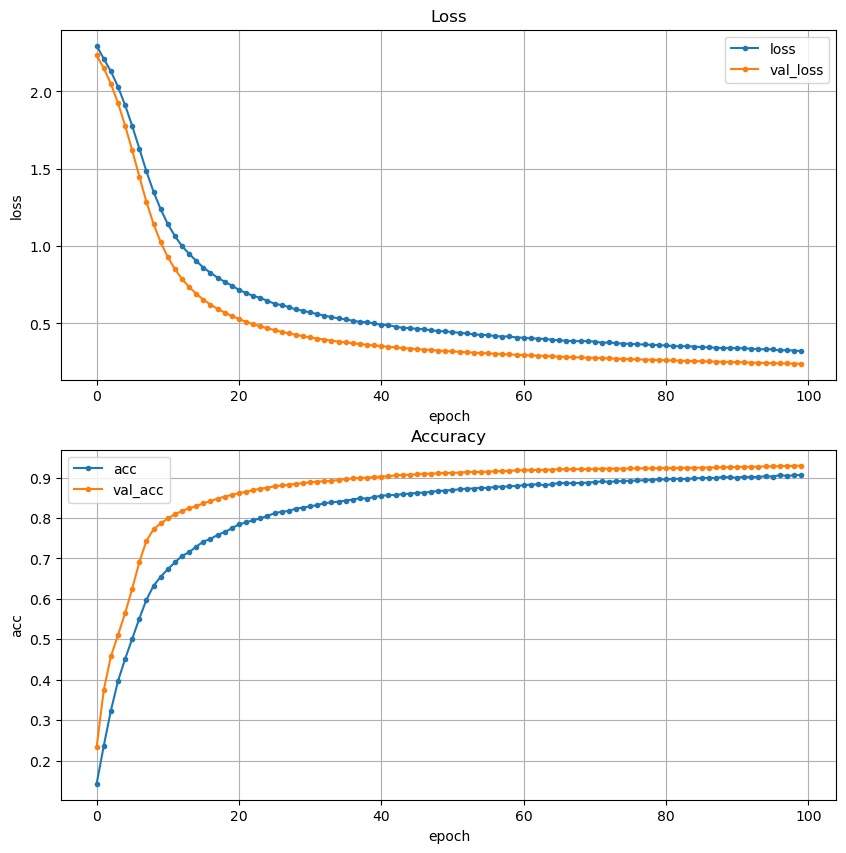

In [9]:
# 학습의 결과를 플롯
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Loss')
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(2,1,2)
plt.title('Accuracy')
plt.plot(range(epochs), acc, marker='.', label='acc')
plt.plot(range(epochs), val_acc, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [10]:
history.history

{'loss': [2.295997381210327,
  2.2113072872161865,
  2.129995346069336,
  2.0306618213653564,
  1.911807894706726,
  1.7762644290924072,
  1.6306403875350952,
  1.4828236103057861,
  1.3510686159133911,
  1.2387313842773438,
  1.1422799825668335,
  1.0647389888763428,
  0.9998621940612793,
  0.950052797794342,
  0.9046307802200317,
  0.860776424407959,
  0.8280330300331116,
  0.7962362170219421,
  0.7694985866546631,
  0.7449637651443481,
  0.7169767618179321,
  0.6968635320663452,
  0.6784858107566833,
  0.664911150932312,
  0.6462374329566956,
  0.6277160048484802,
  0.6189990043640137,
  0.6060698628425598,
  0.5903823971748352,
  0.5825574398040771,
  0.5709100961685181,
  0.5605087876319885,
  0.5509821176528931,
  0.5411344170570374,
  0.5332980155944824,
  0.5257263779640198,
  0.5181260704994202,
  0.5103768110275269,
  0.5074996948242188,
  0.4997756779193878,
  0.49145448207855225,
  0.4882971942424774,
  0.47951120138168335,
  0.4718388020992279,
  0.47003576159477234,
  0.4

# sklearn 라이브러리의 MLPClassifier 이용한 분류분석

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# train과 test 분리안하는 경우

In [14]:
from sklearn.utils import shuffle
import pandas as pd

In [15]:
# 1. 데이터 로드
iris = load_iris()
XX, yy = iris.data, iris.target

In [16]:
# 데이터 분리 (훈련 데이터와 테스트 데이터)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 데이터 스케일링 (MLP는 입력 데이터가 스케일링된 상태에서 더 잘 작동)
scaler = StandardScaler()
XX = scaler.fit_transform(XX)

df = pd.DataFrame(XX, columns=iris.feature_names)
df['target'] = yy

# 3. 데이터 섞기 종별로 정렬되어 있어, 학습에 영향을 미침
df_shuffled = shuffle(df, random_state=42)

print(df_shuffled.head())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
73            0.310998         -0.592373           0.535409          0.000878   
18           -0.173674          1.709595          -1.169714         -1.183812   
118           2.249683         -1.052767           1.785832          1.448832   
78            0.189830         -0.362176           0.421734          0.395774   
76            1.159173         -0.592373           0.592246          0.264142   

     target  
73        1  
18        0  
118       2  
78        1  
76        1  


In [17]:
X=df_shuffled.drop(columns=['target'])
y = df_shuffled['target']

In [18]:
# 4. MLPClassifier 정의 (은닉층 1개, 노드 3개)
clf = MLPClassifier(hidden_layer_sizes=(10,), random_state=42)

# 5. 모델 학습
clf.fit(X, y)

# 6. 예측
y_pred = clf.predict(X)

# 7. 성능 평가
print("Accuracy:", accuracy_score(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, target_names=iris.target_names))
print("\nConfusion Matrix:\n", confusion_matrix(y,y_pred))

Accuracy: 0.9066666666666666

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      0.98      0.99        50
  versicolor       0.97      0.74      0.84        50
   virginica       0.79      1.00      0.88        50

    accuracy                           0.91       150
   macro avg       0.92      0.91      0.91       150
weighted avg       0.92      0.91      0.91       150


Confusion Matrix:
 [[49  1  0]
 [ 0 37 13]
 [ 0  0 50]]


/opt/homebrew/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# train과 test 분리하는 경우

In [19]:
# 1. 데이터 로드
iris = load_iris()
X, y = iris.data, iris.target
target_names = iris.target_names

In [20]:
# 2. 데이터 분리 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True, stratify=y)

In [21]:
# 3. 데이터 스케일링 (MLPClassifier는 스케일링된 입력 데이터에서 성능이 더 좋음)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. MLPClassifier 모델 정의 (은닉층 1개, 노드 5개)
clf = MLPClassifier(hidden_layer_sizes=(5,), activation='relu', max_iter=500, random_state=42)

# 5. 모델 학습
clf.fit(X_train, y_train)

# 6. 예측
y_pred = clf.predict(X_test)

# 7. 성능 평가
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 0.9333333333333333
Confusion Matrix:
[[10  0  0]
 [ 1  8  1]
 [ 0  0 10]]

Classification Report:
              precision    recall  f1-score   support

      setosa       0.91      1.00      0.95        10
  versicolor       1.00      0.80      0.89        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



/opt/homebrew/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
